<a href="https://colab.research.google.com/github/MouseLand/Kilosort/blob/main/docs/tutorials/kilosort4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

First make sure you are connected to a runtime with a GPU. Click `Runtime` in the File menu and click `Change runtime type` and set the Hardware Accelerator to be GPU.

### 1. Download example data

This is an example electrophysiological recording from the International Brain Laboratory, recorded using a Neuropixels 1.0 probe (all data [here](https://ibl.flatironinstitute.org/public/), note to use their full datasets you will need to decompress them with [`mtscomp`](https://github.com/int-brain-lab/mtscomp)). The full recording is over 4000 seconds long, and the cropped recording is 90 seconds long.

Downloading the cropped recording will take around 3 minutes in google colab. If it fails, please try again (press play again), it sometimes hangs.

You can alternatively use any bin file and upload to google drive to access in the notebook. (mount google drive, then look in `/content/drive/MyDrive/`).

In [ ]:
import urllib.request
from tqdm import tqdm
import zipfile
from pathlib import Path

class DownloadProgressBar(tqdm):
    """ from https://stackoverflow.com/a/53877507 """
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_url(url, output_path):
    # Download zip-compressed data file.
    zip_file = Path(output_path).with_suffix('.zip')
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=zip_file, reporthook=t.update_to)
    # Unzip to specified `output_path`.
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(output_path.parent)
    # Remove zip archive after unzipping.
    zip_file.unlink()

## FULL DATASET (download locally then decompress)
# compressed using mtscomp (https://github.com/int-brain-lab/mtscomp)
# URL = 'https://ibl.flatironinstitute.org/public/mainenlab/Subjects/ZFM-02370/2021-04-28/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.e510da60-53e0-4e00-b369-3ea16c45623a.cbin'

## CROPPED DATASET
URL = 'https://osf.io/download/67effd64f74150d8738b7f34/'
download_url(URL, Path.home())

ZFM-02370_mini.imec0.ap.bin: 2.08GB [02:34, 13.4MB/s]


### 2. Install kilosort and download probe maps

In [ ]:
!pip install kilosort

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 47.1 MB/s eta 0:00:00


In [1]:
# download channel maps for probes
from kilosort.utils import download_probes
download_probes()

## Run kilosort

In [ ]:
from kilosort import run_kilosort, DEFAULT_SETTINGS

settings = DEFAULT_SETTINGS
# ( path to drive if mounted: /content/drive/MyDrive/ )
settings['data_dir'] = '/content/'
settings['n_chan_bin'] = 385

ops, st, clu, tF, Wall, similar_templates, is_ref, est_contam_rate, kept_spikes = \
    run_kilosort(settings=settings, probe_name='NeuroPix1_default.mat')

Downloading: "https://www.kilosort.org/downloads/neuropixPhase3A_kilosortChanMap.mat" to /root/.kilosort/probes/neuropixPhase3A_kilosortChanMap.mat



100%|██████████| 2.02k/2.02k [00:00<00:00, 5.69MB/s]


Downloading: "https://www.kilosort.org/downloads/neuropixPhase3B1_kilosortChanMap.mat" to /root/.kilosort/probes/neuropixPhase3B1_kilosortChanMap.mat



100%|██████████| 2.03k/2.03k [00:00<00:00, 2.26MB/s]


Downloading: "https://www.kilosort.org/downloads/neuropixPhase3B2_kilosortChanMap.mat" to /root/.kilosort/probes/neuropixPhase3B2_kilosortChanMap.mat



100%|██████████| 2.02k/2.02k [00:00<00:00, 7.28MB/s]


Downloading: "https://www.kilosort.org/downloads/NP2_kilosortChanMap.mat" to /root/.kilosort/probes/NP2_kilosortChanMap.mat



100%|██████████| 2.00k/2.00k [00:00<00:00, 2.28MB/s]


Downloading: "https://www.kilosort.org/downloads/Linear16x1_kilosortChanMap.mat" to /root/.kilosort/probes/Linear16x1_kilosortChanMap.mat



100%|██████████| 555/555 [00:00<00:00, 1.71MB/s]


Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
Using GPU for PyTorch computations. Specify `device` to change this.
sorting /content/ZFM-02370_mini.imec0.ap.bin
using probe neuropixPhase3B1_kilosortChanMap.mat


/usr/local/lib/python3.10/dist-packages/kilosort/io.py:497: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  X[:, self.nt : self.nt+nsamp] = torch.from_numpy(data).to(self.device).float()


Preprocessing filters computed in  1.50s; total  1.51s

computing drift
Re-computing universal templates from data.


100%|██████████| 45/45 [00:54<00:00,  1.22s/it]


drift computed in  56.40s; total  57.91s

Extracting spikes using templates
Re-computing universal templates from data.


100%|██████████| 45/45 [00:58<00:00,  1.30s/it]


197494 spikes extracted in  59.16s; total  117.08s

First clustering


100%|██████████| 96/96 [00:27<00:00,  3.53it/s]


447 clusters found, in  27.48s; total  144.55s

Extracting spikes using cluster waveforms


100%|██████████| 45/45 [00:17<00:00,  2.55it/s]


290888 spikes extracted in  17.93s; total  162.49s

Final clustering


100%|██████████| 96/96 [00:30<00:00,  3.17it/s]


416 clusters found, in  30.28s; total  192.77s

Merging clusters
405 units found, in  0.72s; total  193.49s

Saving to phy and computing refractory periods
259 units found with good refractory periods

Total runtime: 194.90s = 00:03:14 h:m:s


### Plot outputs of algorithm

You can also download the `kilosort4` folder with the outputs, and open it in [**phy**](https://github.com/cortex-lab/phy) to view the results.

load in outputs

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

# outputs saved to results_dir
results_dir = Path(settings['data_dir']).joinpath('kilosort4')
ops = np.load(results_dir / 'ops.npy', allow_pickle=True).item()
camps = pd.read_csv(results_dir / 'cluster_Amplitude.tsv', sep='\t')['Amplitude'].values
contam_pct = pd.read_csv(results_dir / 'cluster_ContamPct.tsv', sep='\t')['ContamPct'].values
chan_map =  np.load(results_dir / 'channel_map.npy')
templates =  np.load(results_dir / 'templates.npy')
chan_best = (templates**2).sum(axis=1).argmax(axis=-1)
chan_best = chan_map[chan_best]
amplitudes = np.load(results_dir / 'amplitudes.npy')
st = np.load(results_dir / 'spike_times.npy')
clu = np.load(results_dir / 'spike_clusters.npy')
firing_rates = np.unique(clu, return_counts=True)[1] * 30000 / st.max()
dshift = ops['dshift']

plot outputs

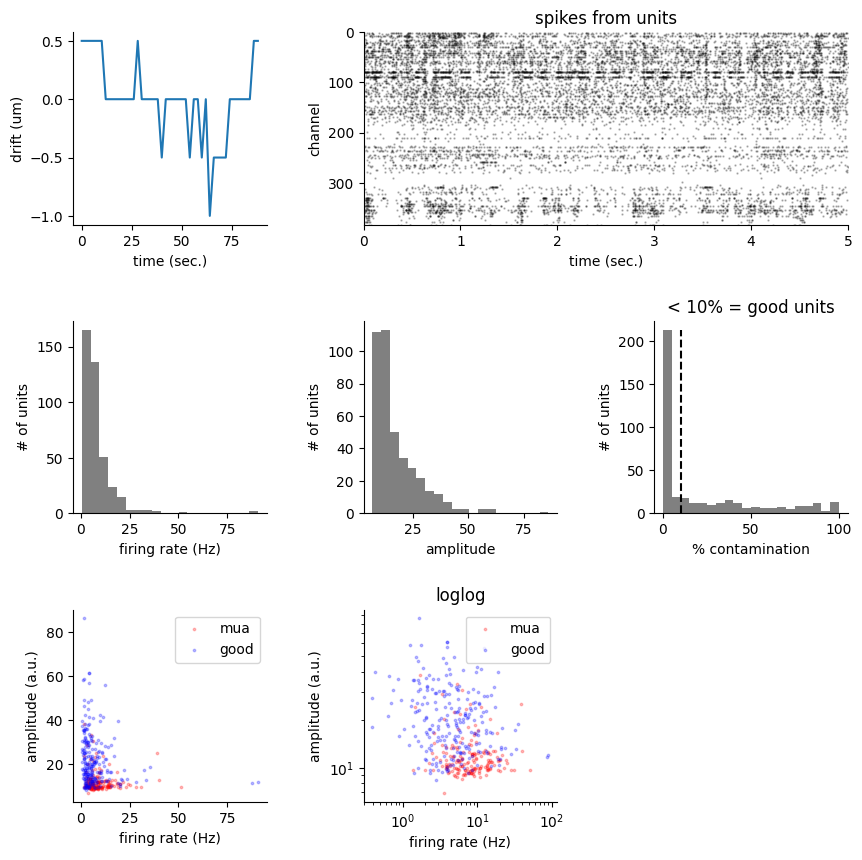

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec, rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
gray = .5 * np.ones(3)

fig = plt.figure(figsize=(10,10), dpi=100)
grid = gridspec.GridSpec(3, 3, figure=fig, hspace=0.5, wspace=0.5)

ax = fig.add_subplot(grid[0,0])
ax.plot(np.arange(0, ops['Nbatches'])*2, dshift);
ax.set_xlabel('time (sec.)')
ax.set_ylabel('drift (um)')

ax = fig.add_subplot(grid[0,1:])
t0 = 0
t1 = np.nonzero(st > ops['fs']*5)[0][0]
ax.scatter(st[t0:t1]/30000., chan_best[clu[t0:t1]], s=0.5, color='k', alpha=0.25)
ax.set_xlim([0, 5])
ax.set_ylim([chan_map.max(), 0])
ax.set_xlabel('time (sec.)')
ax.set_ylabel('channel')
ax.set_title('spikes from units')

ax = fig.add_subplot(grid[1,0])
nb=ax.hist(firing_rates, 20, color=gray)
ax.set_xlabel('firing rate (Hz)')
ax.set_ylabel('# of units')

ax = fig.add_subplot(grid[1,1])
nb=ax.hist(camps, 20, color=gray)
ax.set_xlabel('amplitude')
ax.set_ylabel('# of units')

ax = fig.add_subplot(grid[1,2])
nb=ax.hist(np.minimum(100, contam_pct), np.arange(0,105,5), color=gray)
ax.plot([10, 10], [0, nb[0].max()], 'k--')
ax.set_xlabel('% contamination')
ax.set_ylabel('# of units')
ax.set_title('< 10% = good units')

for k in range(2):
    ax = fig.add_subplot(grid[2,k])
    is_ref = contam_pct<10.
    ax.scatter(firing_rates[~is_ref], camps[~is_ref], s=3, color='r', label='mua', alpha=0.25)
    ax.scatter(firing_rates[is_ref], camps[is_ref], s=3, color='b', label='good', alpha=0.25)
    ax.set_ylabel('amplitude (a.u.)')
    ax.set_xlabel('firing rate (Hz)')
    ax.legend()
    if k==1:
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title('loglog')

~~~~~~~~~~~~~~ good units ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title = number of spikes from each unit


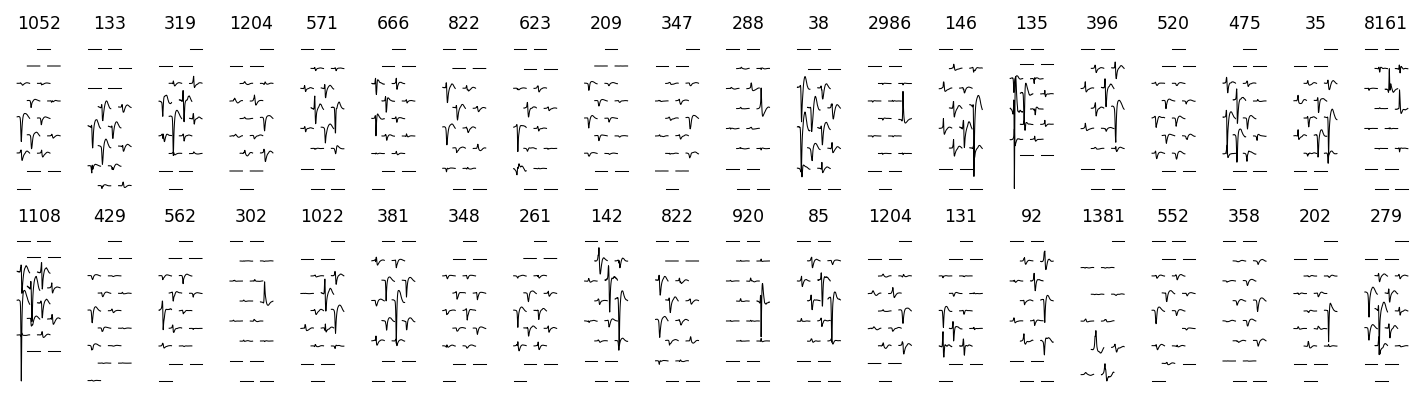

~~~~~~~~~~~~~~ mua units ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
title = number of spikes from each unit


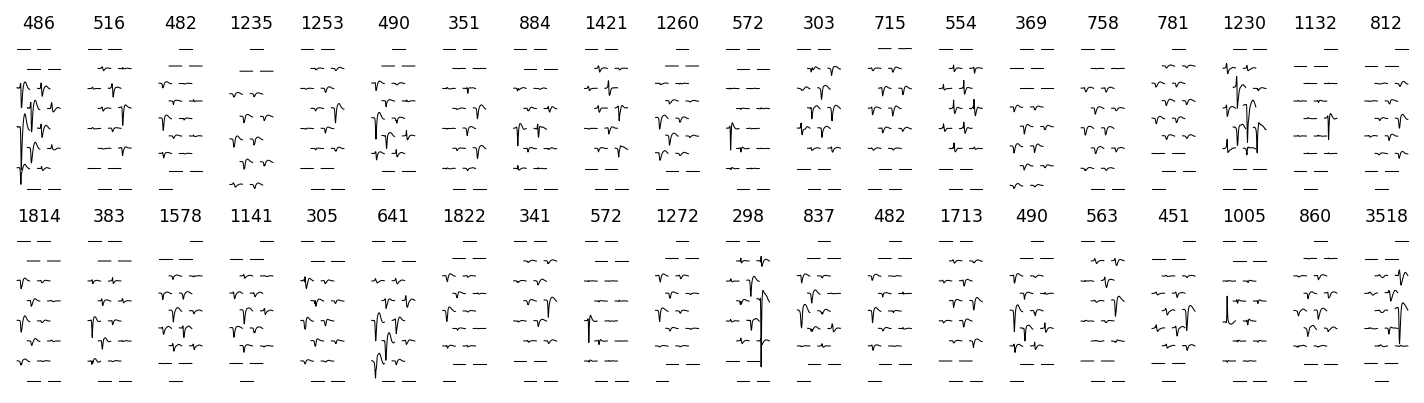

In [ ]:
probe = ops['probe']
# x and y position of probe sites
xc, yc = probe['xc'], probe['yc']
nc = 16 # number of channels to show
good_units = np.nonzero(contam_pct <= 0.1)[0]
mua_units = np.nonzero(contam_pct > 0.1)[0]


gstr = ['good', 'mua']
for j in range(2):
    print(f'~~~~~~~~~~~~~~ {gstr[j]} units ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('title = number of spikes from each unit')
    units = good_units if j==0 else mua_units
    fig = plt.figure(figsize=(12,3), dpi=150)
    grid = gridspec.GridSpec(2,20, figure=fig, hspace=0.25, wspace=0.5)

    for k in range(40):
        wi = units[np.random.randint(len(units))]
        wv = templates[wi].copy()
        cb = chan_best[wi]
        nsp = (clu==wi).sum()

        ax = fig.add_subplot(grid[k//20, k%20])
        n_chan = wv.shape[-1]
        ic0 = max(0, cb-nc//2)
        ic1 = min(n_chan, cb+nc//2)
        wv = wv[:, ic0:ic1]
        x0, y0 = xc[ic0:ic1], yc[ic0:ic1]

        amp = 4
        for ii, (xi,yi) in enumerate(zip(x0,y0)):
            t = np.arange(-wv.shape[0]//2,wv.shape[0]//2,1,'float32')
            t /= wv.shape[0] / 20
            ax.plot(xi + t, yi + wv[:,ii]*amp, lw=0.5, color='k')

        ax.set_title(f'{nsp}', fontsize='small')
        ax.axis('off')
    plt.show()